In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(8523, 12)

In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
train_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [9]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
test_data["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [11]:
test_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [12]:
test_data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [13]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
train_data["Item_Weight"]=train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean())

In [16]:
test_data["Item_Weight"]=test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean())

In [17]:
train_data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
train_data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Filling Missing values

In [19]:
train_data["Outlet_Size"]=train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode(),inplace=True)

In [20]:
test_data["Outlet_Size"]=test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode(),inplace=True)

In [21]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  5681
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 720x432 with 0 Axes>

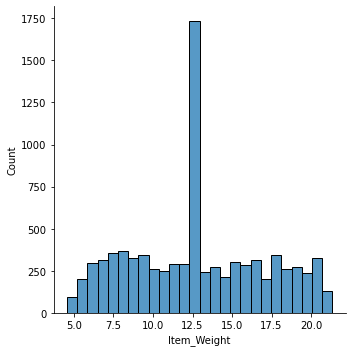

In [23]:
plt.figure(figsize=(10,6))
sns.displot(train_data['Item_Weight'])
plt.show()

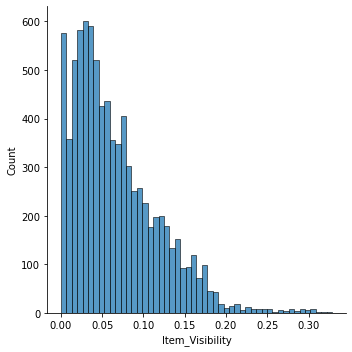

In [24]:
sns.displot(train_data['Item_Visibility'])
plt.show()

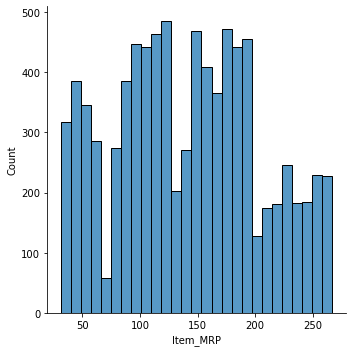

In [25]:
sns.displot(train_data['Item_MRP'])
plt.show()

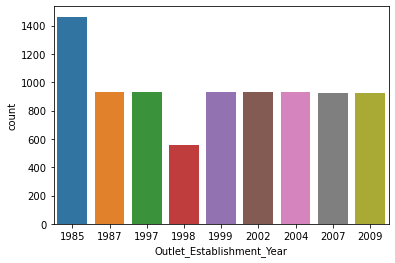

In [26]:
sns.countplot(x=train_data['Outlet_Establishment_Year'])
plt.show()

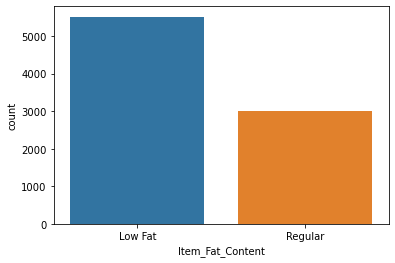

In [27]:
sns.countplot(x=train_data['Item_Fat_Content'])
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
catagory=['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type','Item_Fat_Content','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']

In [30]:
for i in catagory:
    train_data[i]=le.fit_transform(train_data[i])

In [31]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,4,0,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,8,0,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,4,0,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,3,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [32]:
for i in catagory:
    test_data[i]=le.fit_transform(test_data[i])

In [33]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,4,0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,7,0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,3,0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,7,0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,0,0,2,3


In [34]:
x=train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [37]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [38]:
from sklearn.metrics import r2_score

In [39]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
train_pred=xgb.predict(x_train)

In [41]:
print("R_2 Score of Train Data:",r2_score(y_train,train_pred))

R_2 Score of Train Data: 0.8589562021934799


In [43]:
test_pred=xgb.predict(x_test)

print("R_2 Score of Test Data:",r2_score(test_pred,y_test))

R_2 Score of Test Data: 0.24072973747549653


In [44]:
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1112,496,12.857645,0,0.099747,6,75.2328,5,0,0,2,3
1751,382,12.150000,0,0.131446,5,246.8460,7,5,0,1,1
7648,1207,5.800000,0,0.131221,4,87.8172,7,5,0,1,1
7362,1415,17.000000,0,0.087388,8,125.0730,0,3,0,2,0
5332,910,12.857645,0,0.009585,5,102.5016,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3503,608,12.857645,0,0.037505,13,126.2704,5,0,0,2,3
975,835,20.000000,1,0.028118,6,46.7744,6,6,0,1,1
6190,1286,19.100000,0,0.178273,9,172.4422,2,7,0,1,1
32,756,18.700000,0,0.000000,13,256.6672,3,8,0,2,2


In [45]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,4,0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,7,0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,3,0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,7,0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,2,0,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,8,0,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,5,0,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,7,0,1,1


In [47]:
original_test_pred=xgb.predict(test_data)



In [48]:
original_test_pred

array([1282.5375 , 1436.3932 ,  149.07616, ..., 1998.8926 , 4583.66   ,
       1548.4347 ], dtype=float32)